In [51]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [52]:
df = pd.read_csv('/content/sample_data/my_data_h.csv', encoding='latin-1', sep=';')

df.head(5)



,price,rooms,size,bathrooms,living_areas,bedrooms,type_of_property,city,region
0,5000000.0,11.0,4992.0,4.0,NaN,NaN,house,La Soukra,La Soukra
1,980000.0,NaN,600.0,1.0,1.0,1.0,house,Tunis,Sidi Bechir
2,530000.0,6.0,540.0,2.0,NaN,NaN,apartment,Djerba,Djerba
3,NaN,3.0,172.0,1.0,NaN,3.0,apartment,La Marsa,Ain Zaghouan Nord
4,2400000.0,14.0,980.0,4.0,NaN,NaN,house,El Menzah,El Menzah 4


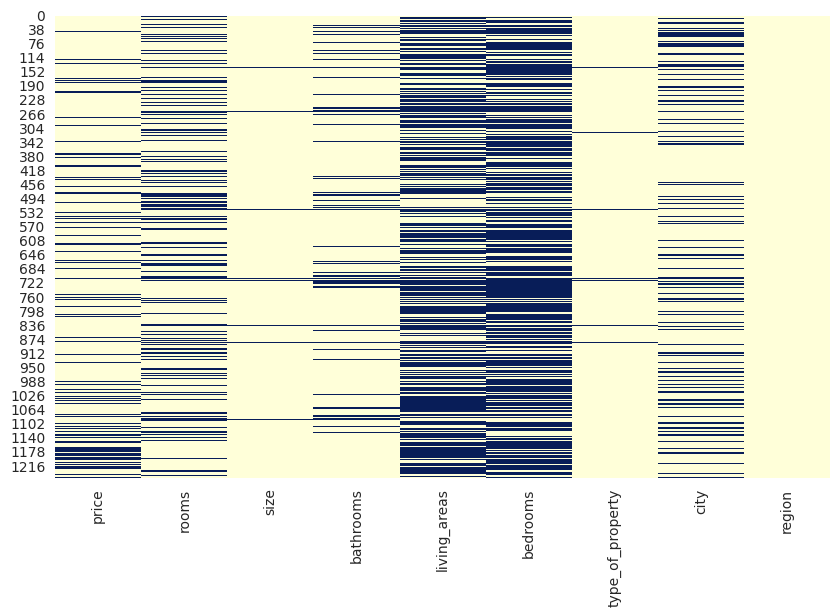

In [53]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sb.heatmap(df.isnull(), cmap='YlGnBu', cbar=False)

# Show the plot
plt.show()

In [54]:
num_rows = len(df)
# Create a new 'id' column with sequential values starting from 1
df['id'] = range(1, num_rows + 1)

# If you want to set the 'id' column as the index, you can do this after adding it:
df.set_index('id', inplace=True)

# Display the DataFrame to check the new 'id' column
print(df)


          price  rooms    size  bathrooms  living_areas  bedrooms  \
id                                                                  
1     5000000.0   11.0  4992.0        4.0           NaN       NaN   
2      980000.0    NaN   600.0        1.0           1.0       1.0   
3      530000.0    6.0   540.0        2.0           NaN       NaN   
4           NaN    3.0   172.0        1.0           NaN       3.0   
5     2400000.0   14.0   980.0        4.0           NaN       NaN   
...         ...    ...     ...        ...           ...       ...   
1243  7500000.0    8.0   990.0        NaN           9.0       NaN   
1244   250000.0    4.0   180.0        1.0           NaN       3.0   
1245   250000.0    3.0   143.0        2.0           4.0       NaN   
1246        NaN    2.0   180.0        1.0           3.0       NaN   
1247   320000.0    3.0   150.0        2.0           NaN       3.0   

     type_of_property             city             region  
id                                        

In [55]:
# Assuming you have already loaded your data into the DataFrame 'df'
# Drop rows with NaN values in the 'price' column
df.dropna(subset=['price'], inplace=True)

# If you reset the index, it will create a new default integer index for the filtered DataFrame
df.reset_index(drop=True, inplace=True)

# Display the DataFrame after removing the rows with NaN in the 'price' column
print(df)

          price  rooms    size  bathrooms  living_areas  bedrooms  \
0     5000000.0   11.0  4992.0        4.0           NaN       NaN   
1      980000.0    NaN   600.0        1.0           1.0       1.0   
2      530000.0    6.0   540.0        2.0           NaN       NaN   
3     2400000.0   14.0   980.0        4.0           NaN       NaN   
4      670000.0    5.0   514.0        2.0           NaN       NaN   
...         ...    ...     ...        ...           ...       ...   
1014   160000.0    3.0   132.0        1.0           4.0       NaN   
1015  7500000.0    8.0   990.0        NaN           9.0       NaN   
1016   250000.0    4.0   180.0        1.0           NaN       3.0   
1017   250000.0    3.0   143.0        2.0           4.0       NaN   
1018   320000.0    3.0   150.0        2.0           NaN       3.0   

     type_of_property             city            region  
0               house        La Soukra         La Soukra  
1               house            Tunis       Sidi Bec

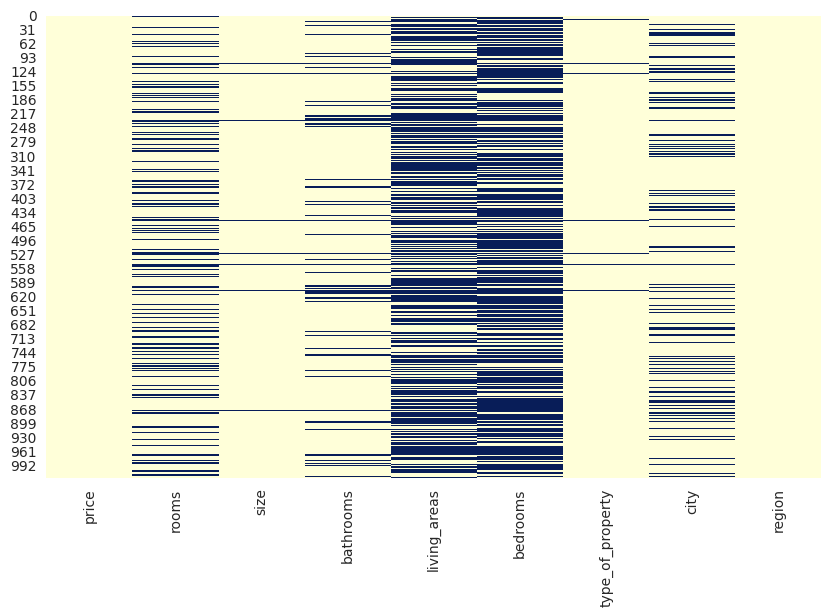

In [56]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sb.heatmap(df.isnull(), cmap='YlGnBu', cbar=False)

# Show the plot
plt.show()

In [57]:
df.describe()


,price,rooms,size,bathrooms,living_areas,bedrooms
count,1.019000e+03,758.000000,998.000000,891.000000,452.000000,344.000000
mean,2.318646e+06,4.852243,490.260521,2.057239,5.057522,3.886628
std,2.390263e+07,2.648359,2300.330349,1.235287,2.896785,1.981385
min,7.500000e+03,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.550000e+05,3.000000,160.250000,1.000000,3.000000,3.000000
50%,4.600000e+05,4.000000,260.000000,2.000000,4.000000,3.000000
75%,8.200000e+05,6.000000,450.000000,3.000000,6.000000,5.000000
max,5.500000e+08,26.000000,68000.000000,14.000000,20.000000,13.000000


In [58]:
print(cl(df.dtypes, attrs = ['bold']))



price               float64
rooms               float64
size                float64
bathrooms           float64
living_areas        float64
bedrooms            float64
type_of_property     object
city                 object
region               object
dtype: object


In [59]:
property_mapping = {'house': 1, 'apartment': 2, 'land': 3}

# Apply the encoding using map()
df['type_of_property_encoded'] = df['type_of_property'].map(property_mapping)

In [60]:
df


,price,rooms,size,bathrooms,living_areas,bedrooms,type_of_property,city,region,type_of_property_encoded
0,5000000.0,11.0,4992.0,4.0,NaN,NaN,house,La Soukra,La Soukra,1.0
1,980000.0,NaN,600.0,1.0,1.0,1.0,house,Tunis,Sidi Bechir,1.0
2,530000.0,6.0,540.0,2.0,NaN,NaN,apartment,Djerba,Djerba,2.0
3,2400000.0,14.0,980.0,4.0,NaN,NaN,house,El Menzah,El Menzah 4,1.0
4,670000.0,5.0,514.0,2.0,NaN,NaN,apartment,Djerba,Djerba,2.0
...,...,...,...,...,...,...,...,...,...,...
1014,160000.0,3.0,132.0,1.0,4.0,NaN,house,NaN,Zarzouna,1.0
1015,7500000.0,8.0,990.0,NaN,9.0,NaN,house,NaN,Tunis,1.0
1016,250000.0,4.0,180.0,1.0,NaN,3.0,house,Tunis,Bab Saadoun,1.0
1017,250000.0,3.0,143.0,2.0,4.0,NaN,house,NaN,Sakiet Ezzit,1.0


In [61]:
df


,price,rooms,size,bathrooms,living_areas,bedrooms,type_of_property,city,region,type_of_property_encoded
0,5000000.0,11.0,4992.0,4.0,NaN,NaN,house,La Soukra,La Soukra,1.0
1,980000.0,NaN,600.0,1.0,1.0,1.0,house,Tunis,Sidi Bechir,1.0
2,530000.0,6.0,540.0,2.0,NaN,NaN,apartment,Djerba,Djerba,2.0
3,2400000.0,14.0,980.0,4.0,NaN,NaN,house,El Menzah,El Menzah 4,1.0
4,670000.0,5.0,514.0,2.0,NaN,NaN,apartment,Djerba,Djerba,2.0
...,...,...,...,...,...,...,...,...,...,...
1014,160000.0,3.0,132.0,1.0,4.0,NaN,house,NaN,Zarzouna,1.0
1015,7500000.0,8.0,990.0,NaN,9.0,NaN,house,NaN,Tunis,1.0
1016,250000.0,4.0,180.0,1.0,NaN,3.0,house,Tunis,Bab Saadoun,1.0
1017,250000.0,3.0,143.0,2.0,4.0,NaN,house,NaN,Sakiet Ezzit,1.0


In [62]:
distinct_cities = df['city'].unique()

# Extract distinct values from 'region' column
distinct_regions = df['region'].unique()

# Print the distinct city and region values
print("Distinct Cities:", distinct_cities)
print("Distinct Regions:", distinct_regions)

Distinct Cities: ['La Soukra' 'Tunis' 'Djerba' 'El Menzah' 'Le Kram' nan 'La Marsa'
 'Carthage' 'Ariana Ville' 'Hammamet' 'Ezzahra' 'Raoued' 'Nabeul' 'e'
 'El Hrairia' 'El Mourouj' 'La Manouba' 'La Goulette' 'Sousse Jaouhara'
 'Le Bardo' 'Mornaguia' 'Sousse Ville' 'Akouda' 'El Omrane Superieur'
 'Oued Ellil' 'Fouchana' 'Tabarka' 'Monastir Ville' 'Hammam Sousse'
 'tunis' 'Bizerte Nord' 'Mornag' 'Sfax Ville' 'Sidi Thabet' 'Hammam Chatt'
 'Midoun' 'Rades' 'Hammam Lif' 'Tebourba' 'a' 'Mahdia Ville' 'Houmt Souk'
 'Sousse Riadh' 'Boumhel' 'El Omrane' 'El Kabaria' 'Cite El Khadra'
 'Mohamadia' 'El Ouardia' 'Boumhel ' 'Kalaat Landalous' 'Ettadhamen'
 'Nouvelle Medina' 'El Aouina' 'Mednine' 'Mornage' 'Megrine ' 'Ben Arous'
 'Sidi Hassine' 'Ettahrir' 'Sfax Ouest' 'Kasserine Nord' 'Mnihla'
 'Douar Hicher' 'Jedaida' 'Megrine' 'Beja' 'Douz' 'Beni Khiar'
 'Boumhel Bassat' 'Sakiet Ezzit' 'Metline' 'La Medina']
Distinct Regions: ['La Soukra' 'Sidi Bechir' 'Djerba' 'El Menzah 4'
 'Les Jardins de Cartha

In [63]:
# Create mapping dictionaries for encoding
city_mapping = {'La Soukra': 1, 'Tunis': 2, 'Djerba': 3, 'El Menzah': 4, 'Le Kram':5,'La Marsa':6,
 'Carthage':7, 'Ariana Ville':8, 'Hammamet':9, 'Ezzahra':10, 'Raoued':11, 'Nabeul':12, 'e':13,
 'El Hrairia':14, 'El Mourouj':15, 'La Manouba':16, 'La Goulette':17, 'Sousse Jaouhara':18,
 'Le Bardo':19, 'Mornaguia':20, 'Sousse Ville':21, 'Akouda' :22, 'El Omrane Superieur':23,
 'Oued Ellil':24, 'Fouchana':25, 'Tabarka':26, 'Monastir Ville':27, 'Hammam Sousse':28,
 'tunis':2, 'Bizerte Nord':29, 'Mornag':30, 'Sfax Ville':40, 'Sidi Thabet':41, 'Hammam Chatt':42,
 'Midoun':43, 'Rades':44, 'Hammam Lif':45, 'Tebourba':46, 'a':47, 'Mahdia Ville':48, 'Houmt Souk':49,
 'Sousse Riadh':50, 'Boumhel':60, 'El Omrane':61, 'El Kabaria':62, 'Cite El Khadra':63,
 'Mohamadia':64,'El Ouardia':65, 'Boumhel ':66, 'Kalaat Landalous':67, 'Ettadhamen':68,
 'Nouvelle Medina':69, 'El Aouina':70, 'Mednine':71, 'Mornage':72, 'Megrine ':73, 'Ben Arous':74,
 'Sidi Hassine':75, 'Ettahrir':76, 'Sfax Ouest':77, 'Kasserine Nord':78, 'Mnihla':79,
 'Douar Hicher':80, 'Jedaida':81, 'Megrine':82, 'Beja':83, 'Douz':84, 'Beni Khiar':85,
 'Boumhel Bassat':86, 'Sakiet Ezzit':87, 'Metline':88, 'La Medina':99}


# Apply the encoding using map()
df['city_encoded'] = df['city'].map(city_mapping)

# Drop the original 'city' and 'region' columns
df.drop(['city', 'region'], axis=1, inplace=True)


In [64]:


# Display the first few rows of the DataFrame after dropping the column
print(df.head())

       price  rooms    size  bathrooms  living_areas  bedrooms  \
0  5000000.0   11.0  4992.0        4.0           NaN       NaN   
1   980000.0    NaN   600.0        1.0           1.0       1.0   
2   530000.0    6.0   540.0        2.0           NaN       NaN   
3  2400000.0   14.0   980.0        4.0           NaN       NaN   
4   670000.0    5.0   514.0        2.0           NaN       NaN   

  type_of_property  type_of_property_encoded  city_encoded  
0            house                       1.0           1.0  
1            house                       1.0           2.0  
2        apartment                       2.0           3.0  
3            house                       1.0           4.0  
4        apartment                       2.0           3.0  


In [65]:
distinct_cities = df['city_encoded'].unique()
print(distinct_cities)


[ 1.  2.  3.  4.  5. nan  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 40. 41. 42. 43. 44.
 45. 46. 47. 48. 49. 50. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 99.]


In [66]:
print(cl(df.dtypes, attrs = ['bold']))

price                       float64
rooms                       float64
size                        float64
bathrooms                   float64
living_areas                float64
bedrooms                    float64
type_of_property             object
type_of_property_encoded    float64
city_encoded                float64
dtype: object


In [67]:
# Convert specified columns to integers
int_columns = ['rooms', 'size', 'bathrooms', 'living_areas', 'bedrooms', 'type_of_property_encoded', 'city_encoded']
df[int_columns] = df[int_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')



In [68]:

# Display the data types after conversion
print(df.dtypes)

price                       float64
rooms                       float64
size                        float64
bathrooms                   float64
living_areas                float64
bedrooms                    float64
type_of_property             object
type_of_property_encoded    float64
city_encoded                float64
dtype: object


In [69]:
int_columns = ['rooms', 'size', 'bathrooms', 'living_areas', 'bedrooms', 'type_of_property_encoded', 'city_encoded']

# Check for non-numeric values in the specified columns
non_numeric_values = df[int_columns].apply(pd.to_numeric, errors='coerce').isna().any()
print(non_numeric_values)

rooms                       True
size                        True
bathrooms                   True
living_areas                True
bedrooms                    True
type_of_property_encoded    True
city_encoded                True
dtype: bool


In [70]:
# Replace non-numeric values with 0 in the specified columns
df[int_columns] = df[int_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df['price'] = df['price'].astype(int)

# Display the data types after conversion
print(df.dtypes)

price                        int64
rooms                        int64
size                         int64
bathrooms                    int64
living_areas                 int64
bedrooms                     int64
type_of_property            object
type_of_property_encoded     int64
city_encoded                 int64
dtype: object


In [71]:
# Drop the 'type_of_property' column
df = df.drop('type_of_property', axis=1)

# Display the updated DataFrame
print(df)

        price  rooms  size  bathrooms  living_areas  bedrooms  \
0     5000000     11  4992          4             0         0   
1      980000      0   600          1             1         1   
2      530000      6   540          2             0         0   
3     2400000     14   980          4             0         0   
4      670000      5   514          2             0         0   
...       ...    ...   ...        ...           ...       ...   
1014   160000      3   132          1             4         0   
1015  7500000      8   990          0             9         0   
1016   250000      4   180          1             0         3   
1017   250000      3   143          2             4         0   
1018   320000      3   150          2             0         3   

      type_of_property_encoded  city_encoded  
0                            1             1  
1                            1             2  
2                            2             3  
3                            1 

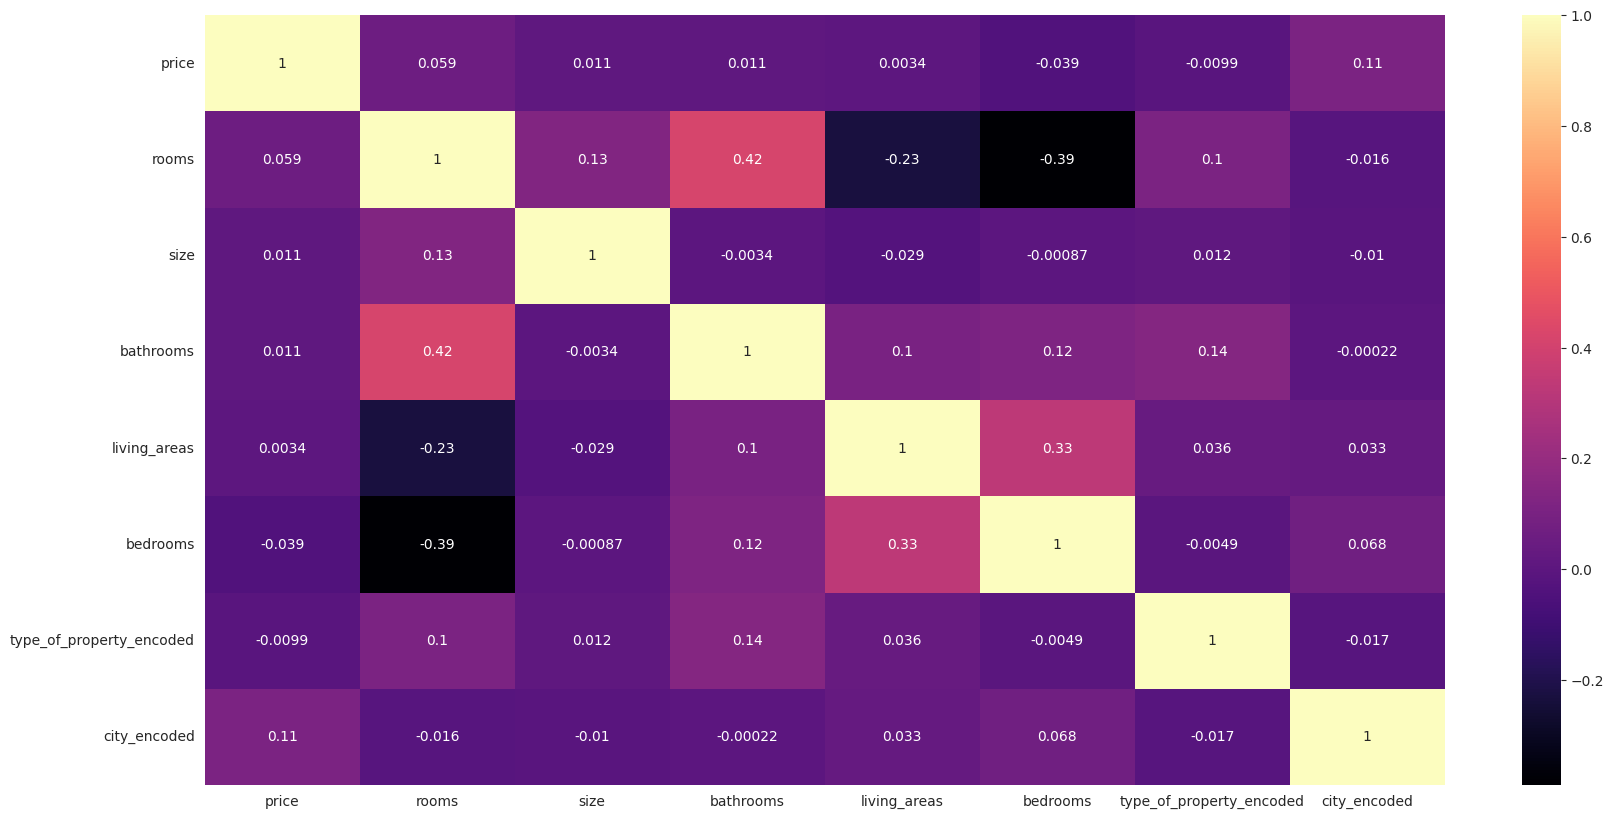

In [72]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

<ipython-input-73-7fe9c0983be0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['price'], color = 'r')


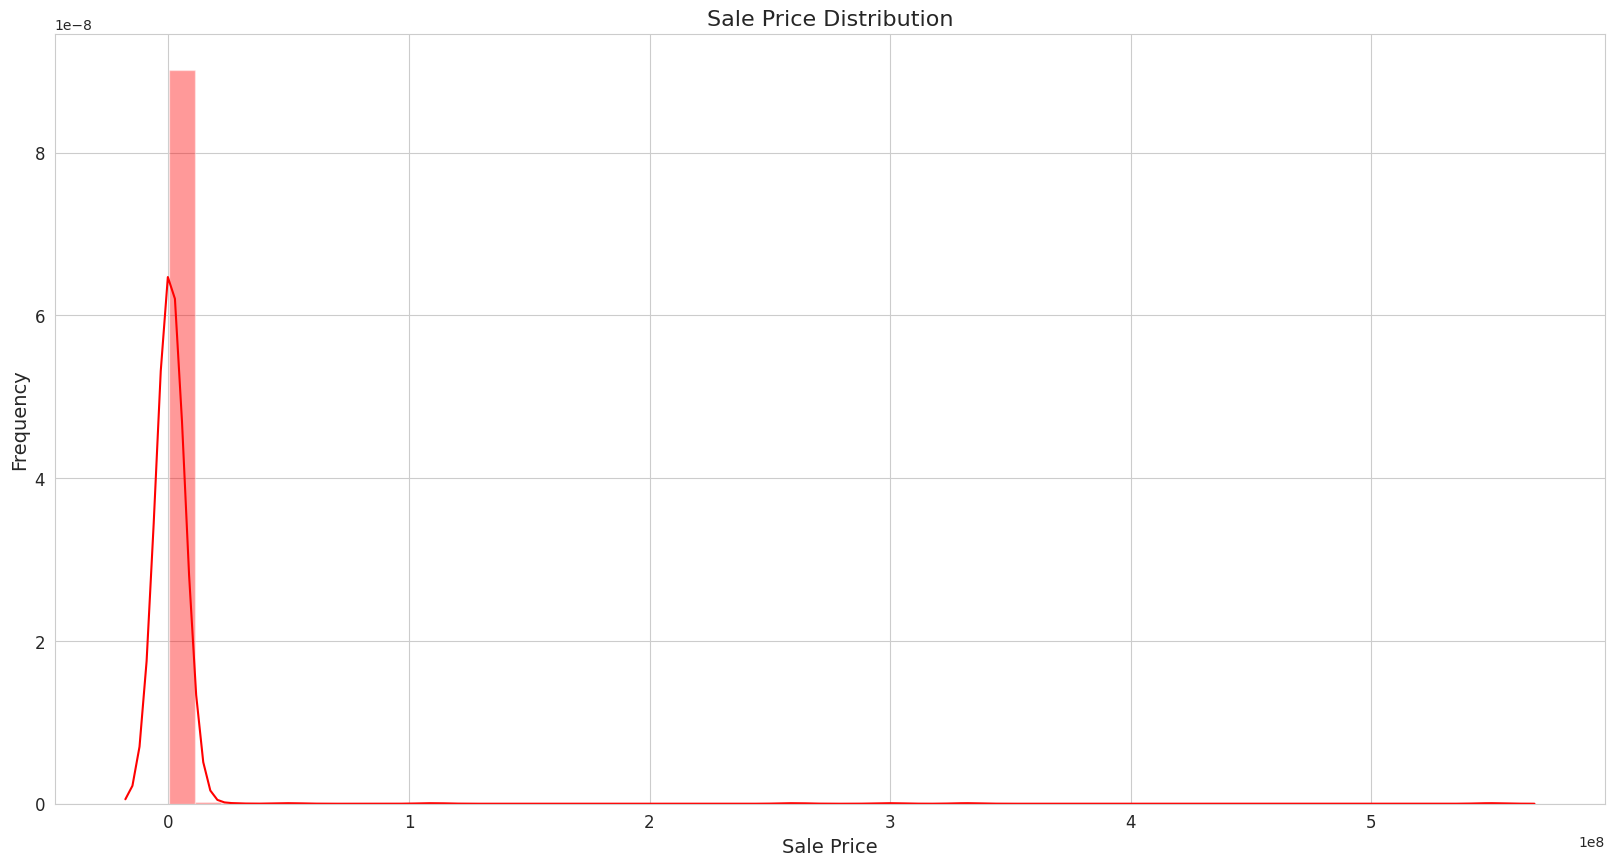

In [73]:
# 3. Distribution plot
#affichage de mix max de variance
sb.distplot(df['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [74]:
df['rooms'].fillna(df['rooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)
df['living_areas'].fillna(df['living_areas'].mean(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)

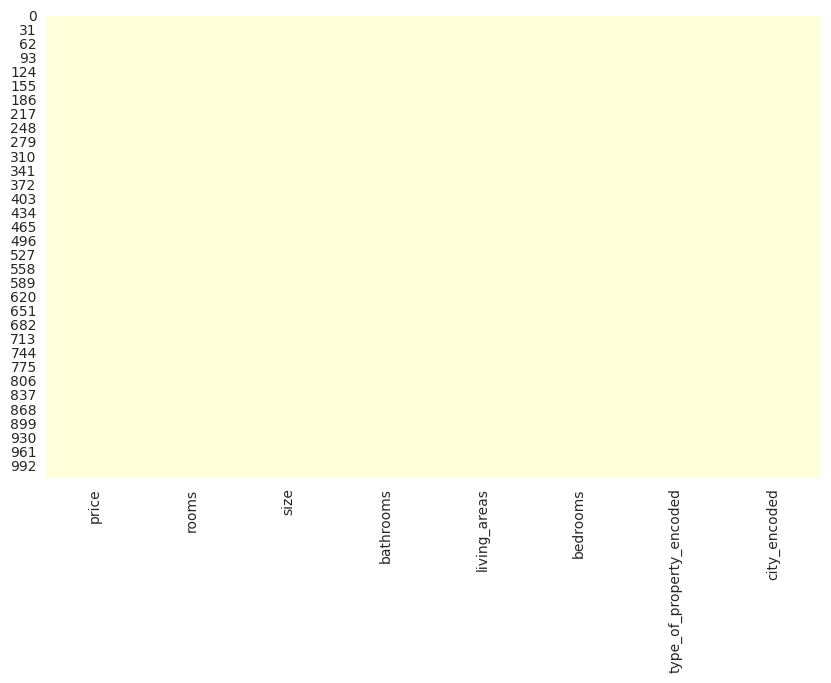

In [75]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sb.heatmap(df.isnull(), cmap='YlGnBu', cbar=False)

# Show the plot
plt.show()

In [76]:
X_var = df[['rooms', 'price',  'rooms',  'size',  'bathrooms',  'living_areas',  'bedrooms','type_of_property_encoded' , 'city_encoded'  ]].values
y_var = df['price'].values


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_var_scaled=scaler.fit_transform(X_var)
y_var=y_var.reshape(-1,1)
y_var_scaled=y_var.reshape(-1,1)


In [78]:


X_train, X_test, y_train, y_test = train_test_split(X_var_scaled, y_var_scaled, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[1.15384615e-01 5.68189566e-04 1.15384615e-01 1.76470588e-03
  7.14285714e-02 0.00000000e+00 0.00000000e+00 1.00000000e+00
  6.66666667e-01]
 [1.92307692e-01 4.40915103e-04 1.92307692e-01 7.20588235e-03
  1.42857143e-01 0.00000000e+00 0.00000000e+00 5.00000000e-01
  0.00000000e+00]
 [7.69230769e-01 1.71365973e-03 7.69230769e-01 4.51470588e-03
  6.42857143e-01 1.00000000e+00 0.00000000e+00 5.00000000e-01
  2.02020202e-02]
 [1.53846154e-01 1.98639072e-03 1.53846154e-01 2.20588235e-03
  2.14285714e-01 2.00000000e-01 0.00000000e+00 5.00000000e-01
  5.05050505e-02]
 [1.53846154e-01 9.31830889e-04 1.53846154e-01 6.32352941e-03
  1.42857143e-01 0.00000000e+00 2.30769231e-01 1.00000000e+00
  2.92929293e-01]]
X_test samples :  [[1.53846154e-01 8.95466756e-04 1.53846154e-01 7.73529412e-03
  7.14285714e-02 0.00000000e+00 0.00000000e+00 1.00000000e+00
  4.54545455e-01]
 [1.53846154e-01 3.13640641e-04 1.53846154e-01 1.91176471e-03
  1.42857143e-01 0.00000000e+00 0.00000000e+00 5

In [79]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
valid_indices = ~np.isnan(ols_yhat) & ~np.isnan(y_test)
correlation = np.corrcoef(ols_yhat[valid_indices], y_test[valid_indices],)[0, 1]


In [87]:
correlation = np.corrcoef(ols_yhat, y_test,rowvar=False)[0, 1]
print("Correlation:", correlation)

Correlation: 1.0


In [88]:
error_ols = ols_yhat - y_test

print("Error (y_hat - y_test):", error_ols)
error_ridge = ridge_yhat - y_test

print("Error (y_hat - y_test):", error_ridge )
error_lasso = lasso_yhat - y_test

print("Error (y_hat - y_test):", error_lasso )

error_bayesian = bayesian_yhat - y_test

print("Error (y_hat - y_test):", error_bayesian )


error_en = en_yhat - y_test

print("Error (y_hat - y_test):", error_en )


Error (y_hat - y_test): [[ 5.70435077e-09]
 [ 6.69388101e-10]
 [-4.71191015e-08]
 [ 1.03609636e-08]
 [ 4.77302819e-09]
 [-5.37838787e-08]
 [-5.76255843e-08]
 [-2.73284968e-08]
 [ 7.28468876e-08]
 [-1.65309757e-08]
 [ 7.56699592e-08]
 [ 1.46916136e-07]
 [ 2.44472176e-09]
 [-3.59141268e-08]
 [ 1.13795977e-08]
 [ 4.39467840e-08]
 [-1.16415322e-09]
 [-3.18541424e-08]
 [-2.97150109e-08]
 [-1.66182872e-08]
 [-3.95812094e-09]
 [-4.94765118e-08]
 [ 4.44706529e-08]
 [-3.32947820e-08]
 [ 1.57160684e-08]
 [ 2.14902684e-07]
 [-3.92319635e-08]
 [-3.11993062e-08]
 [-5.25615178e-08]
 [-4.18513082e-08]
 [-1.42317731e-08]
 [ 1.84169039e-07]
 [-8.44011083e-10]
 [-1.35623850e-08]
 [-5.77419996e-08]
 [-1.38534233e-08]
 [-3.16067599e-08]
 [ 1.17986929e-07]
 [-5.69270924e-08]
 [-3.22470441e-08]
 [-3.42843123e-08]
 [ 6.17001206e-09]
 [-4.09781933e-08]
 [ 7.39237294e-08]
 [-3.56812961e-08]
 [ 1.49011612e-08]
 [ 3.49245965e-10]
 [ 4.49945219e-08]
 [-4.30154614e-08]
 [ 5.72763383e-08]
 [-3.57977115e-08]
 [ 1.47

In [35]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 1.0
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.9504555690966322
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9999999998376137
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 8.659739592076221e-15
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.5254690487597717
-------------------------------------------------------------------------------


In [ ]:
#correlation(y_hat,y_test)/y_hat-y_test(erreur)

In [ ]:
#remove bedrooms/ fill the null values

In [36]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 1.0
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.9504459243869647
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.9999999998372567
-------------------------------------------------------------------------------
R-Squared of Bayesian model is -0.00012667364480978272
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.5253670286167211
-------------------------------------------------------------------------------


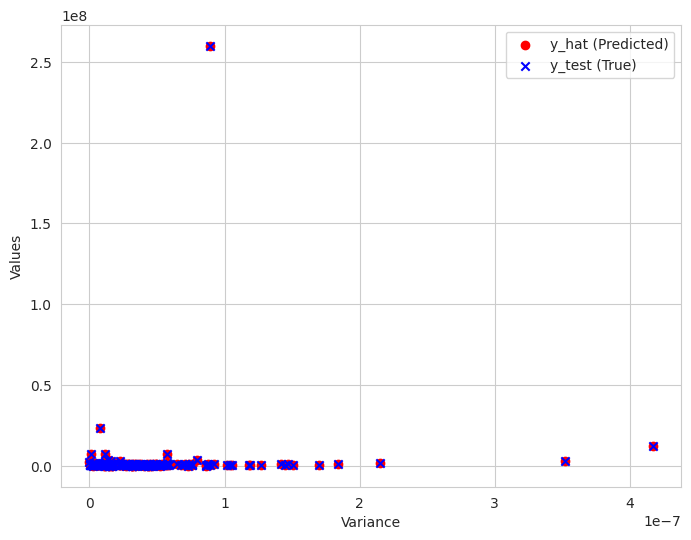

In [37]:
# Calculate the variance between y_hat and y_test
variance = np.abs(ols_yhat - y_test)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot y_hat and y_test
ax.scatter(variance, ols_yhat, label='y_hat (Predicted)', color='red', marker='o')
ax.scatter(variance, y_test, label='y_test (True)', color='blue', marker='x')

# Add labels and legend
ax.set_xlabel('Variance')
ax.set_ylabel('Values')
ax.legend()

# Show the plot
plt.show()



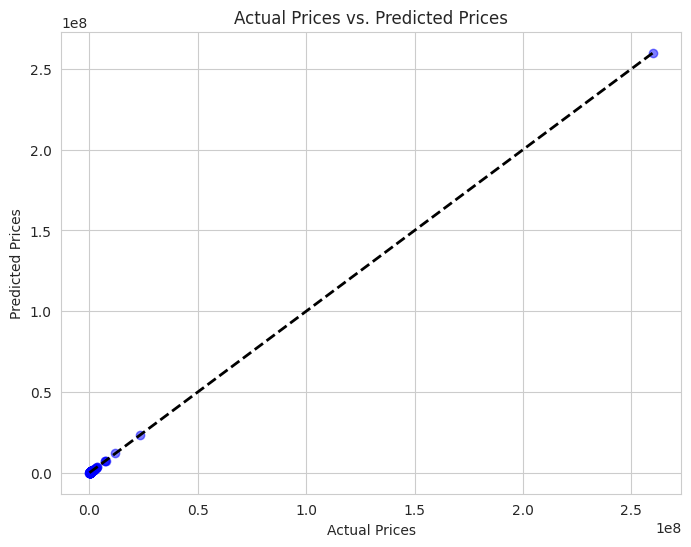

In [38]:
#y=price
#predicted price different color
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ols_yhat, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line y = x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

<Axes: xlabel='rooms', ylabel='price'>

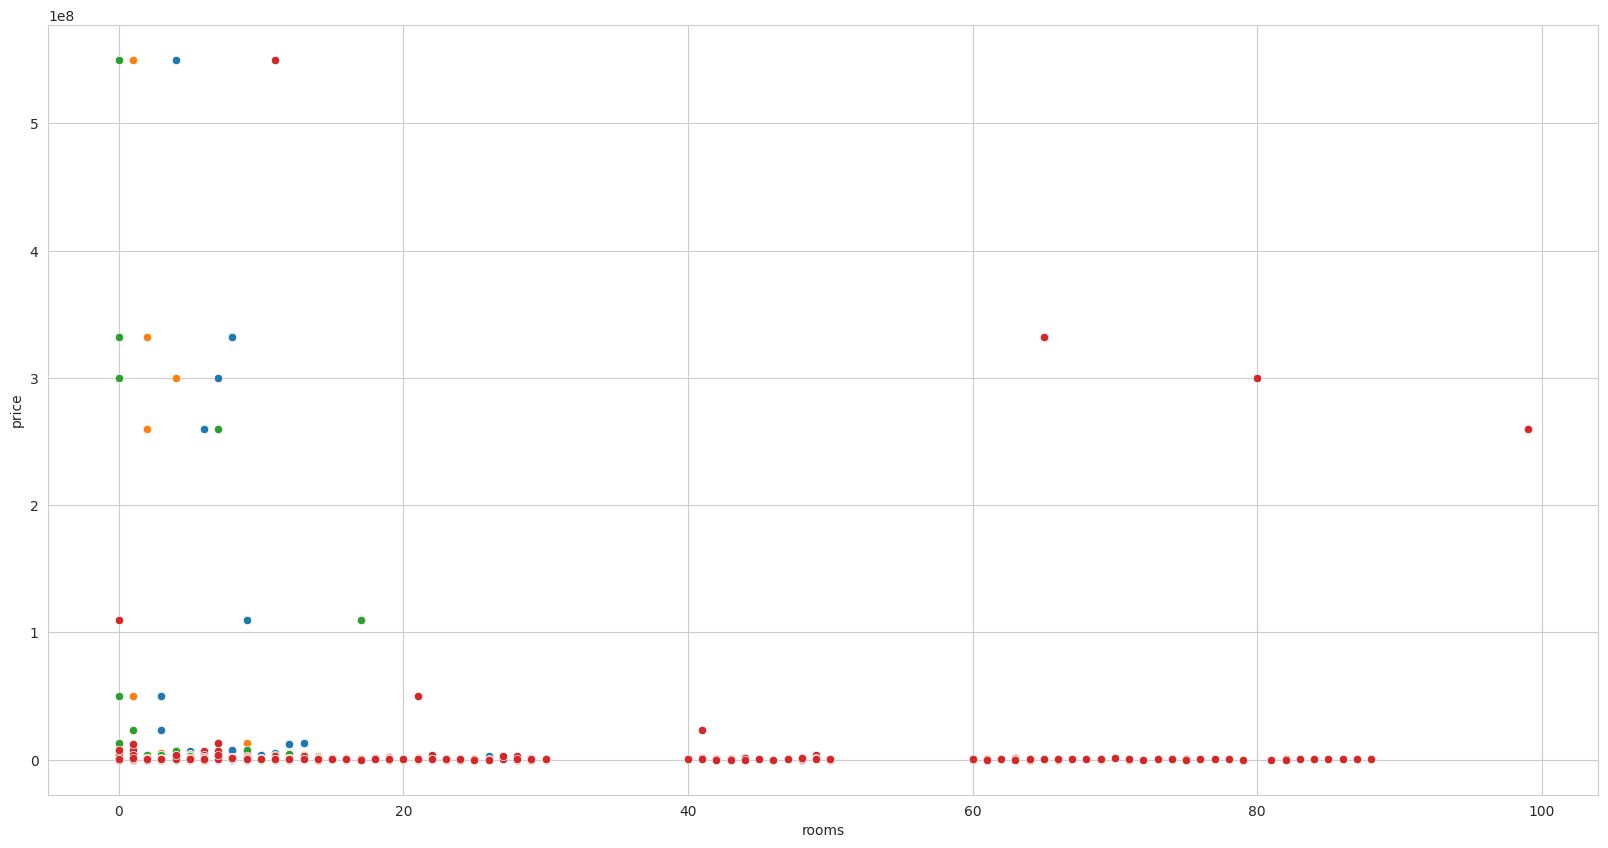

In [39]:
sb.scatterplot(x='rooms',y='price',data=df)
sb.scatterplot(x='bathrooms',y='price',data=df)
sb.scatterplot(x='living_areas',y='price',data=df)
sb.scatterplot(x='city_encoded',y='price',data=df)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'living_areas'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'type_of_property_encoded'}>,
        <Axes: title={'center': 'city_encoded'}>, <Axes: >]], dtype=object)

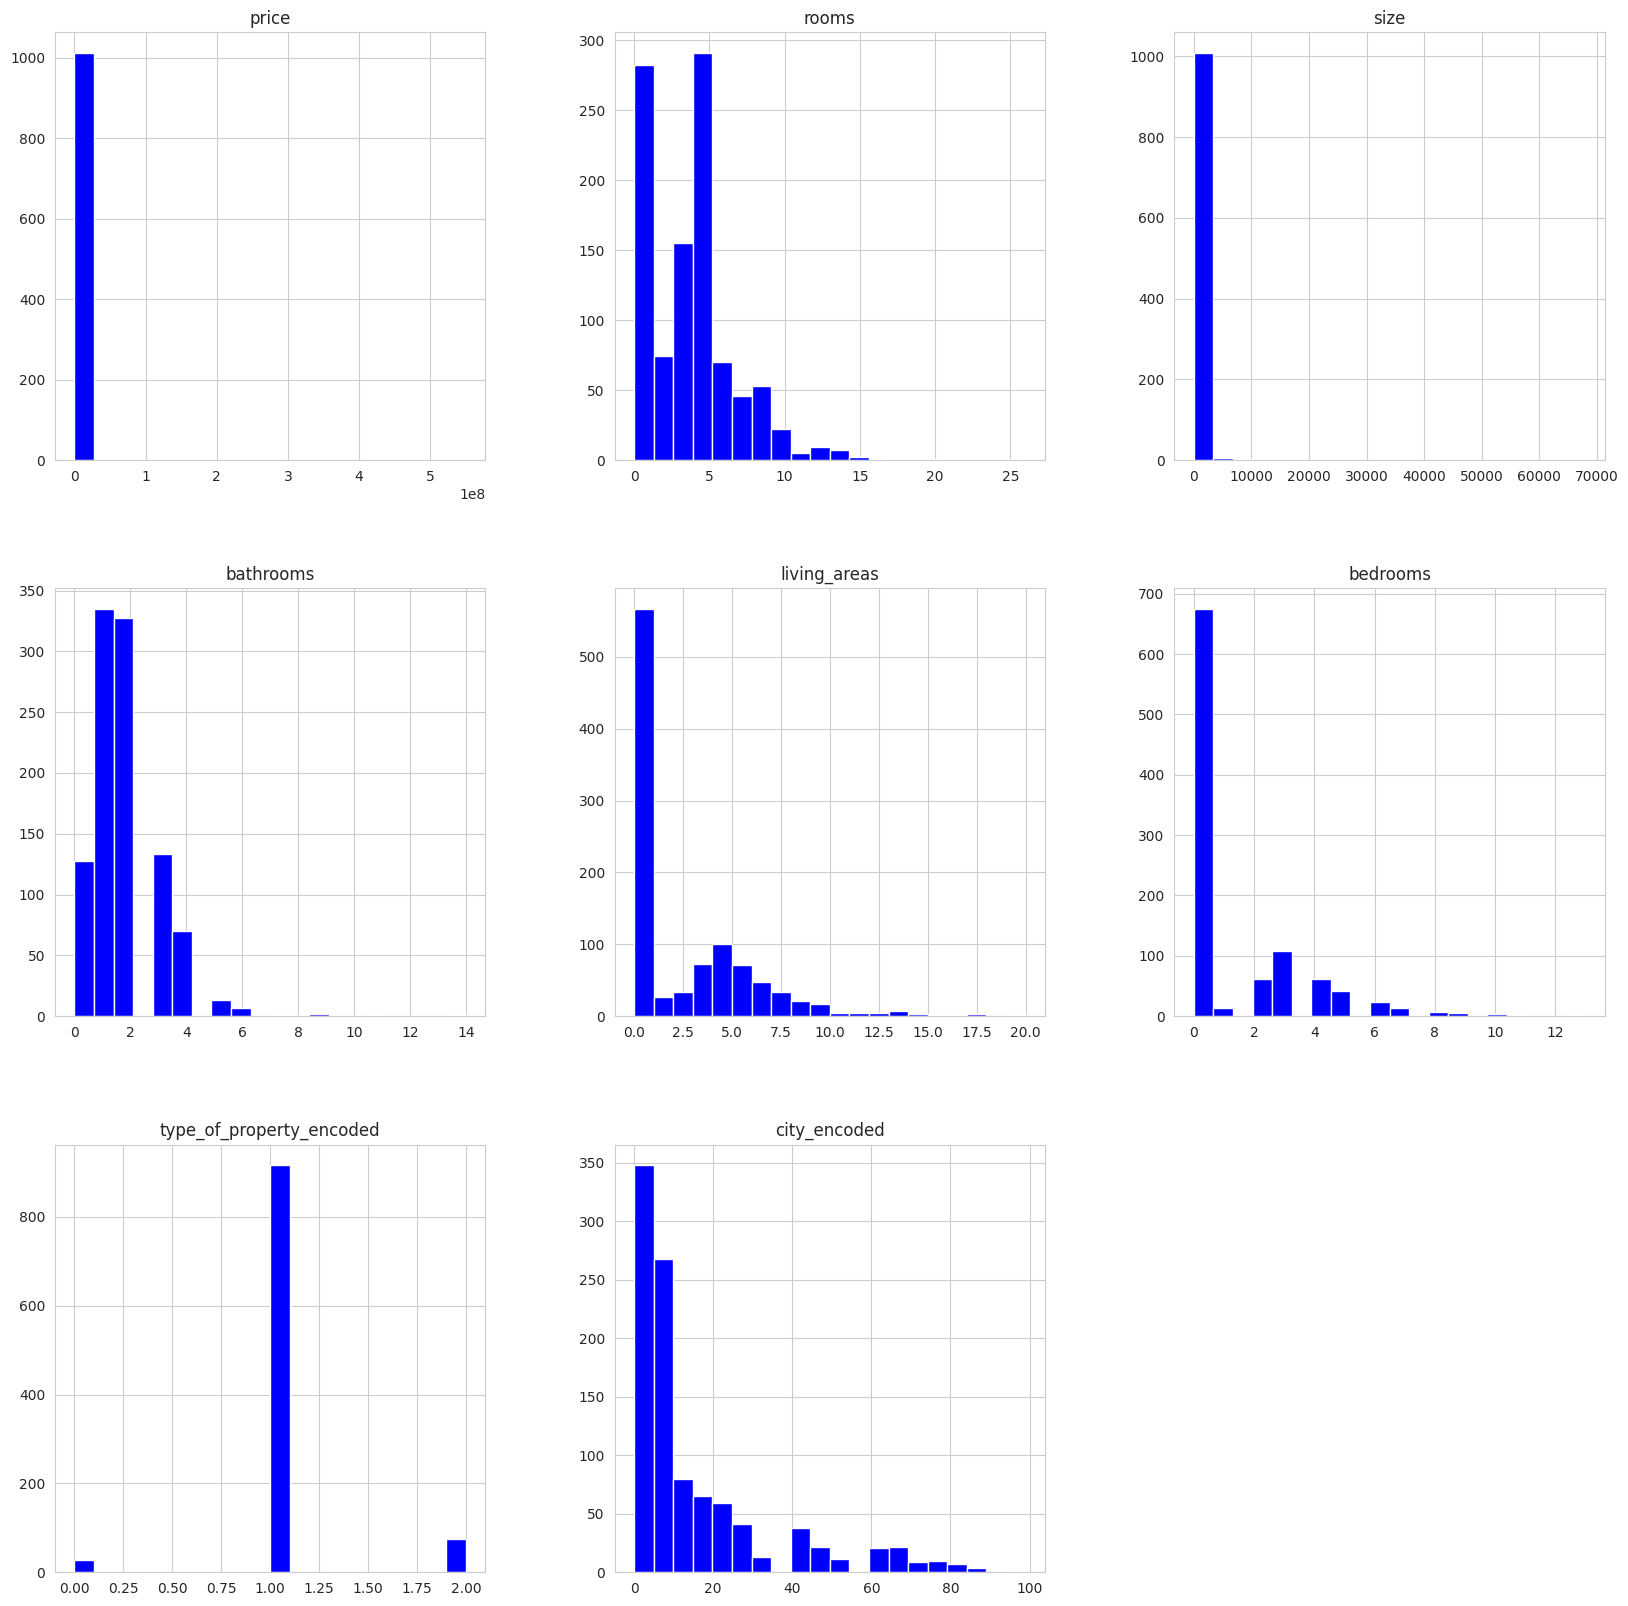

In [40]:
df.hist(bins =20, figsize=(20,20),color='b')

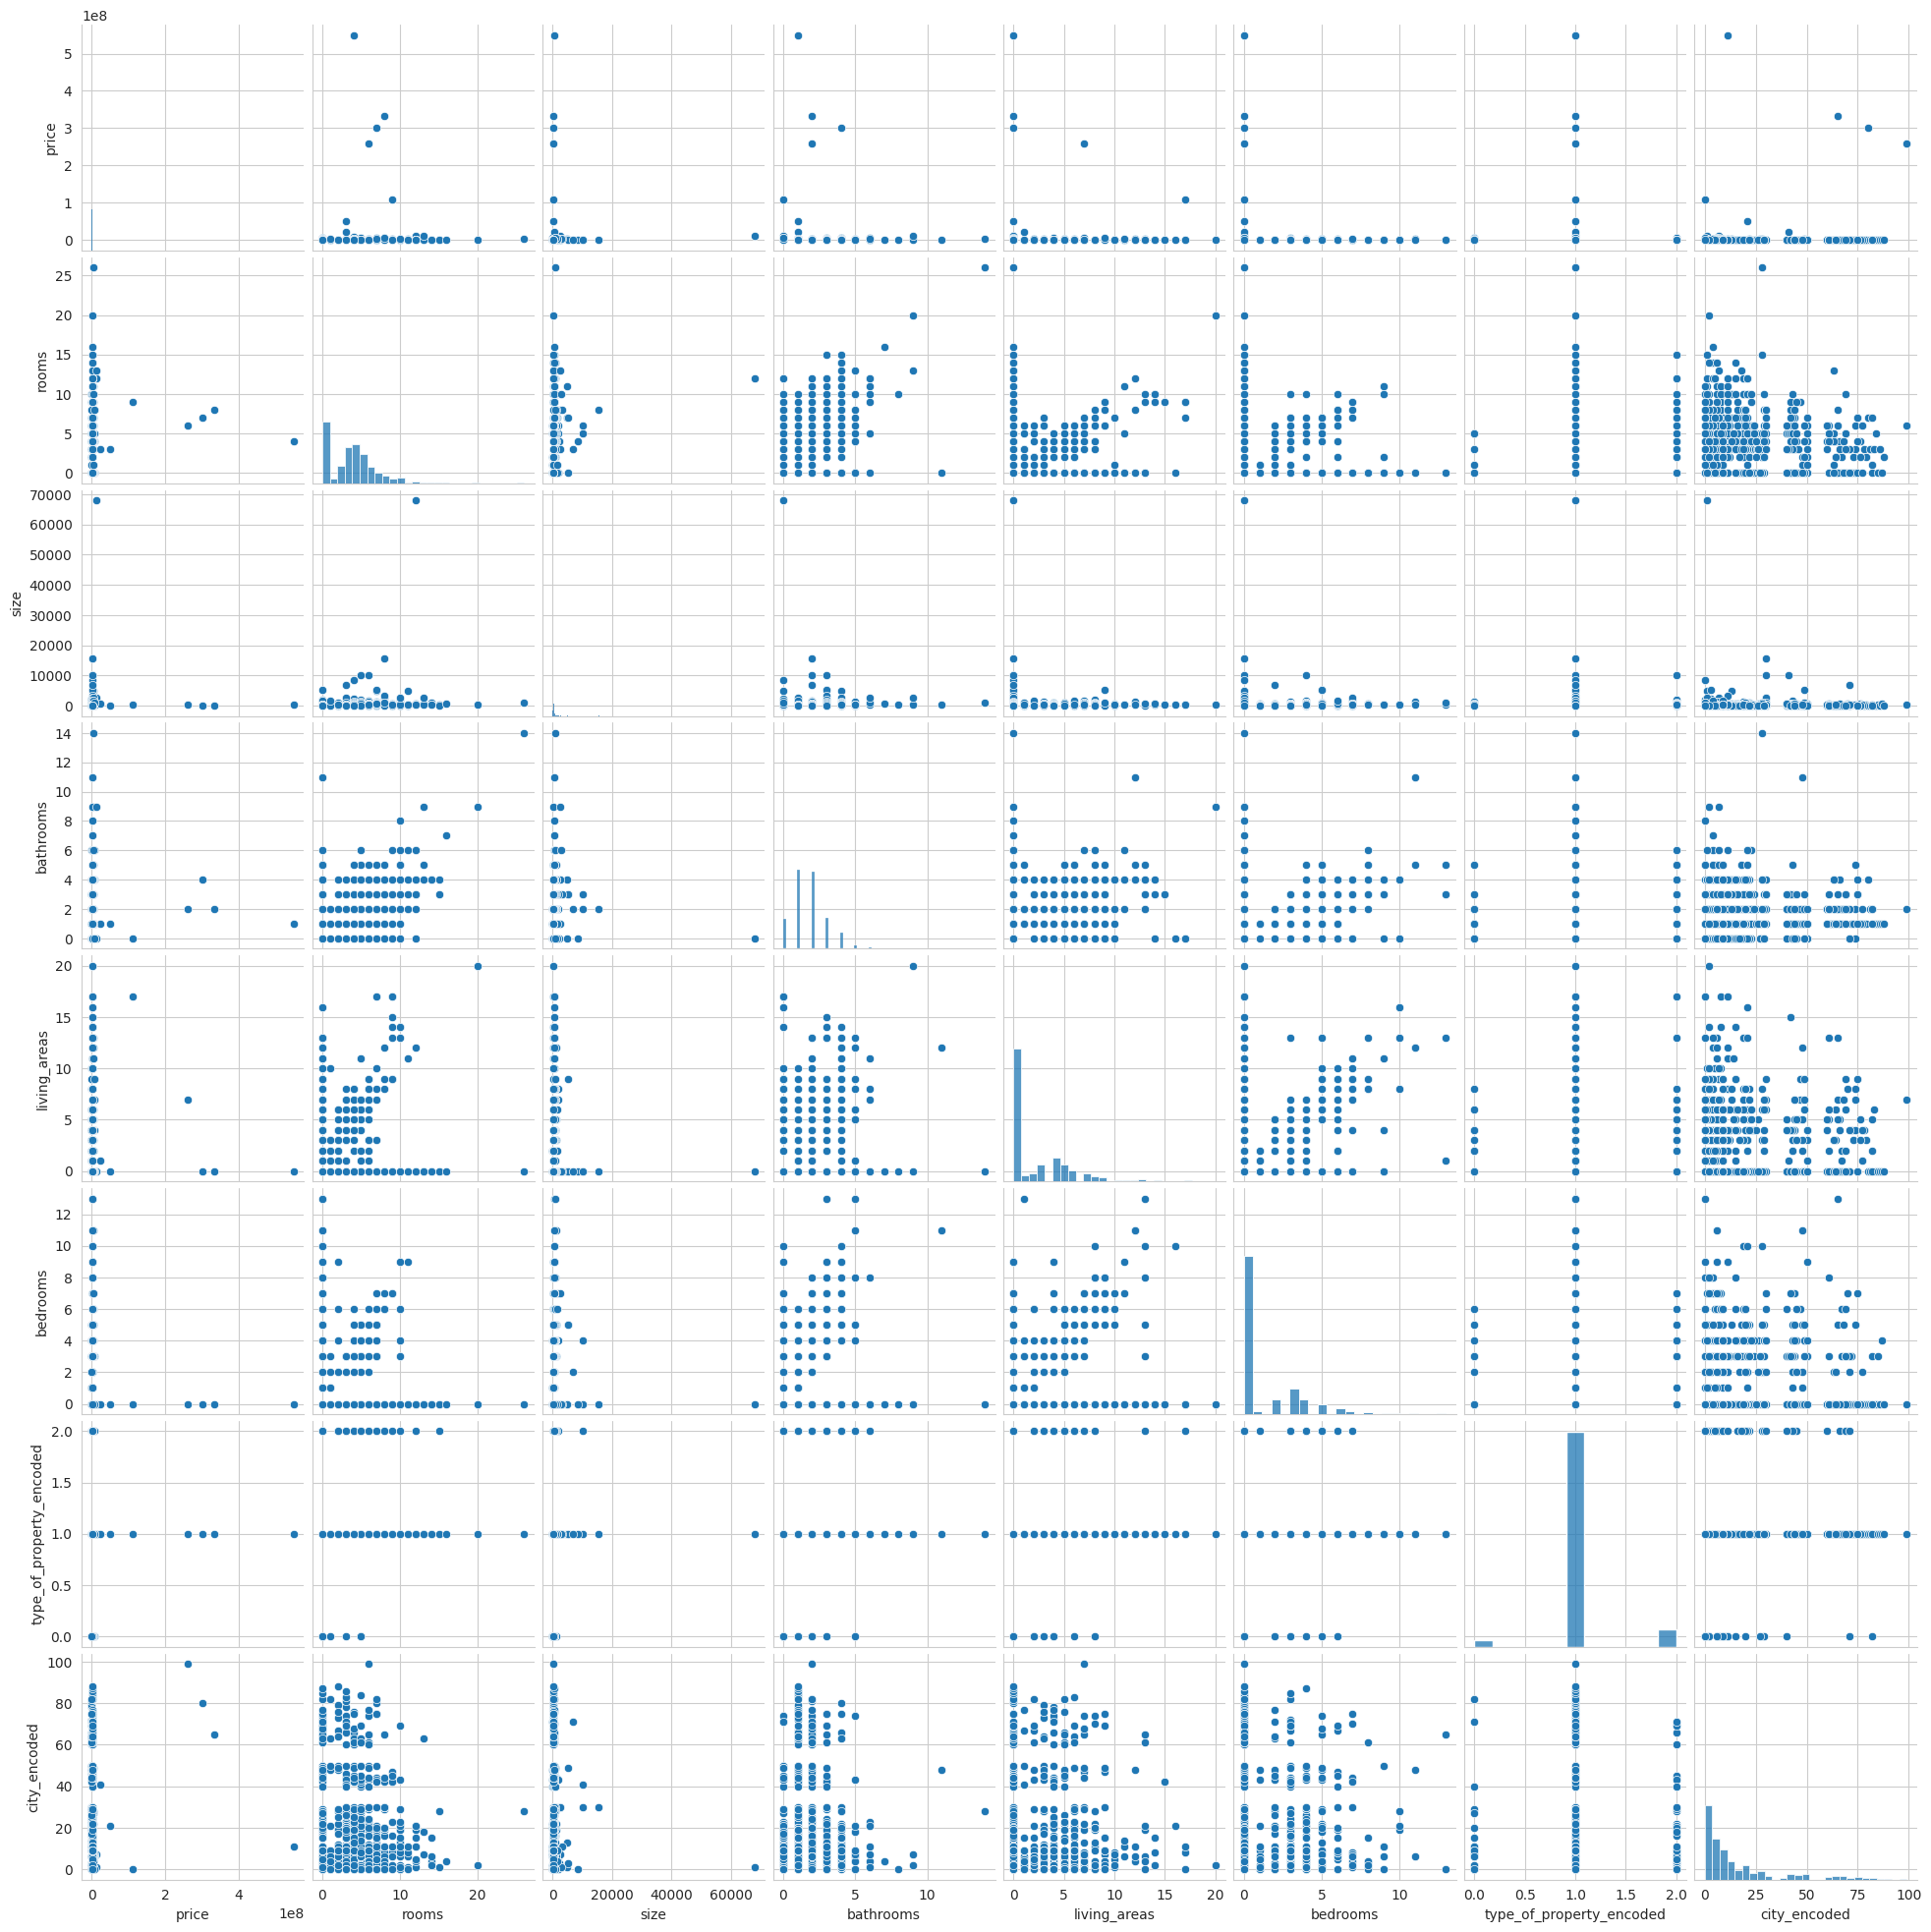

In [ ]:
sb.pairplot(df)

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X_var_scaled,y_var_scaled,test_size=0.25)

In [42]:
X_train.shape


(764, 9)

In [43]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(100,input_dim=9,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))




In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 51,701
Trainable params: 51,701
Non-traina

In [45]:
model.compile(optimizer='Adam', loss = 'mean_squared_error')
epoch_hist=model.fit(X_train,Y_train,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 38ms/step - loss: 460905557000192.0000 - val_loss: 1089558675456.0000
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 460905624109056.0000 - val_loss: 1089554743296.0000
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 460905590554624.0000 - val_loss: 1089538293760.0000
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 460905389228032.0000 - val_loss: 1089466466304.0000
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 460904785248256.0000 - val_loss: 1089200521216.0000
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 460901798903808.0000 - val_loss: 1088375816192.0000
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 460896899956736.0000 - val_loss: 1086635704320.0000
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 460886162538496.0000 - val_loss: 1082372784128.0000

<ipython-input-46-1ee0b8f91601>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training Loss','Validation Loss')


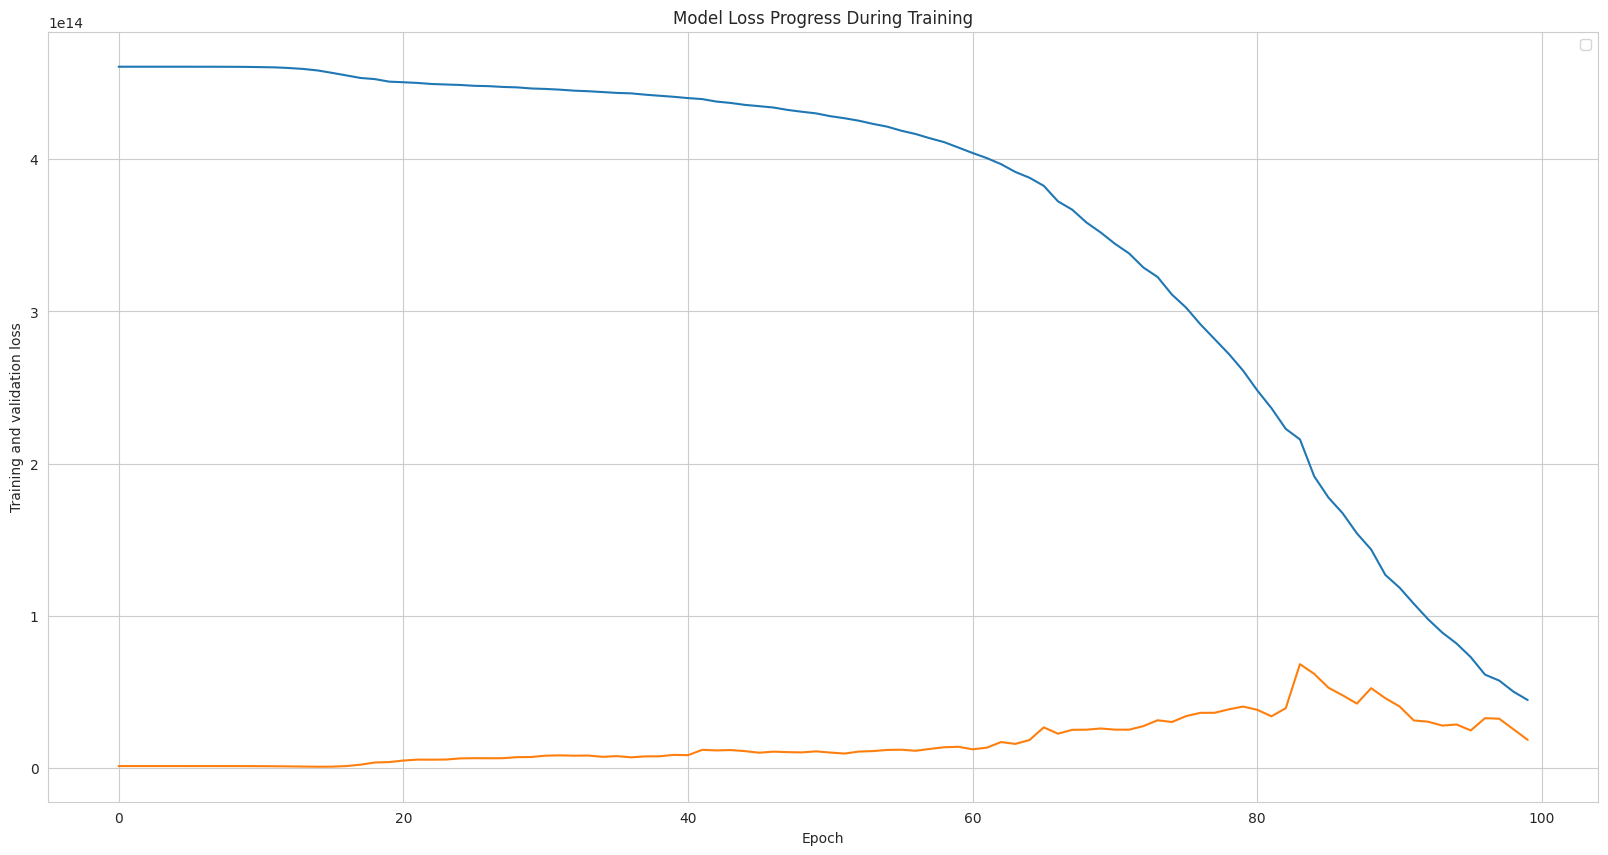

In [46]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')
plt.legend('Training Loss','Validation Loss')

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# Fit your model
rf_model.fit(X_train, y_train)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(y_test, rf_val_predictions)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


<ipython-input-93-7589cf4734bc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Validation MAE for Random Forest Model: 330205.02107843134
